<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/EDA-airbnb/blob/main/AirBNB_EDA_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for <u>security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.</u> </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?
 </b>

#Initializing

In [179]:
#importing pandas ,numpy,matplotlib.pyplot & seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
# Set the display figure size using rcParams method 
sns.set(rc={'figure.figsize':(16.7,8.27)})
plt.rcParams['figure.figsize'] = [16.7,8.27]

In [180]:
#mounting the google drive with coolab notebook 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
# Define the path where data is kept
working_directory = '/content/drive/MyDrive/Colab Notebooks/Capstone EDA/Airbnb NYC 2019.csv'
df = pd.read_csv(working_directory)
sns.set(rc={'figure.figsize':(16.7,8.27)})
plt.rcParams['figure.figsize'] = [16.7,8.27]

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Handling missing, duplicate, and bogus values

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [184]:
#creating a backup data frame
df_with_na=df
#filling all the nan values in #reviews_per_month to 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
#removing all the duplicate entries
df.drop_duplicates(inplace = True)
#removing all the hoses whose listed price is zero
df=df.loc[df['price']>0]
# datafram for the rooms which are not available 
not_avaailable_rooms_df=df.loc[df['availability_365']==0]
#removing all the homes which are available for zero-days
df=df.loc[df['availability_365']>0]
#replacing nan values with blank space
df['name'] = df['name'].fillna('')
#converting date str to date time object
df['last_review']=pd.to_datetime(df['last_review'])

# Univariate analysis

# Column NO. 1 : name

In [185]:
#geting the number of unique names from the name column 
df.name.nunique()

30878

In [186]:
df.host_name

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
5                Chris
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 31354, dtype: object

This column contains the name(description) of the property which the host is giving on rent by which he can draw the customer's attention.

# Column NO. 2 & 3 : host_id, host_name 



In [187]:
df.host_id

0            2787
1            2845
2            4632
3            4869
5            7322
           ...   
48890     8232441
48891     6570630
48892    23492952
48893    30985759
48894    68119814
Name: host_id, Length: 31354, dtype: int64

In [188]:
#geting the number of unique id from the host_id column 
df.host_id.nunique()

21808

This column contains all the unique id of hosts there are a total of 2188 hosts in the database

In [189]:
df.host_name

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
5                Chris
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 31354, dtype: object

In [190]:
#geting the number of unique host name from the host_name column 
df.host_name.nunique()

8213

Observations
1. This column contains all the unique names of hosts. We observe in all 8214 different hosts names in this database.
2. By comparing the unique numbers of host and host ID it can be concluded that there are many hosts with the same name.
3. So we will use host id for all further analysis.





# Column NO. 4 : neighbourhood_group


In [191]:
#geting unique neighborhood groups from the neighborhood_groups column 
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Neighbourhood group')

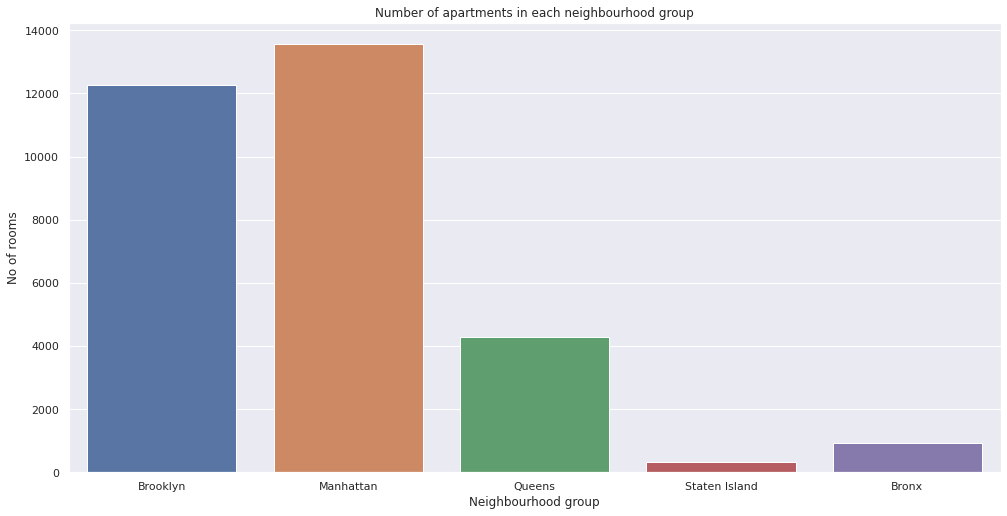

In [192]:
#creating a count plot 
sns.countplot(df.neighbourhood_group).set_title('Number of apartments in each neighbourhood group')
#adding x and y labels to the plot
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood group')

Observation
1. We can see that most no of rooms are in Manhattan followed by brooklyn and queens
2. Manhattan people prefer to book an entire home rather than a private room. Brooklyn, both have approx equal no of count while people do not prefer a shared room in either of the city.

# Column NO. 5 : neighbourhood

In [193]:
df.neighbourhood.value_counts()

Bedford-Stuyvesant    2478
Williamsburg          2051
Harlem                1734
Bushwick              1447
Hell's Kitchen        1446
                      ... 
Willowbrook              1
Fort Wadsworth           1
Rossville                1
Richmondtown             1
Silver Lake              1
Name: neighbourhood, Length: 218, dtype: int64

their are a total of 217 neighbourhood area under neighbourhood_group

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of rooms')

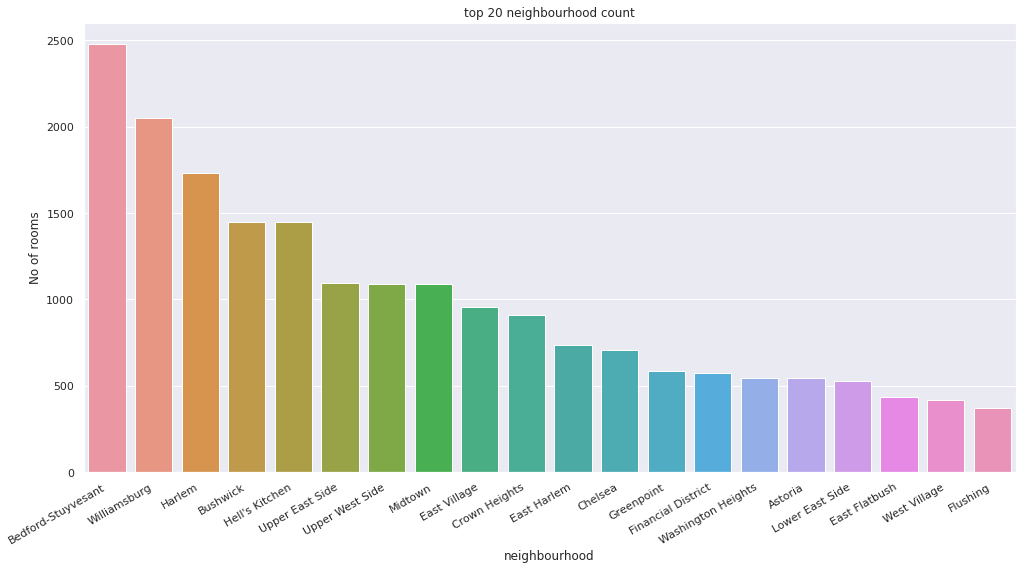

In [194]:
#creating a count plot
sns.countplot(df.neighbourhood, order = df.neighbourhood.value_counts().iloc[:20].index ).set_title('top 20 neighbourhood count')
#rotating the x axis labels 
plt.xticks(rotation=30,ha='right')
#adding x and y labels to the plot
plt.ylabel('No of rooms')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of rooms')

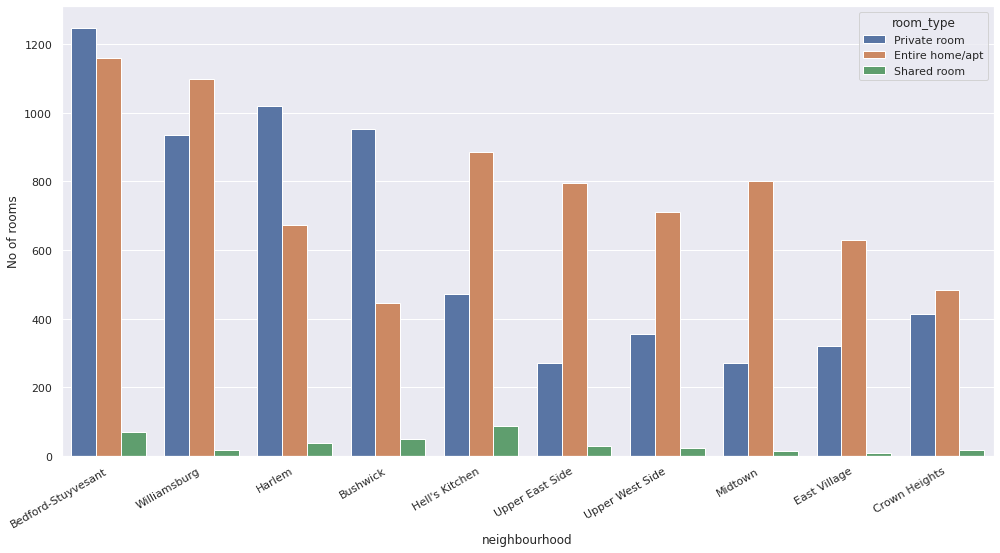

In [195]:
sns.countplot(df.neighbourhood, order = df.neighbourhood.value_counts().iloc[:10].index ,hue=df['room_type'])
#rotating the x axis labels 
plt.xticks(rotation=30,ha='right')
#adding x and y labels to the plot
plt.ylabel('No of rooms')


In [196]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [197]:
#storing all the diffrent neighbourhood groups to diffrent data frames 
brooklyn_group_df=df.loc[df['neighbourhood_group']== 'Brooklyn']
manhattan_group_df=df.loc[df['neighbourhood_group']== 'Manhattan']
Queens_group_df=df.loc[df['neighbourhood_group']== 'Queens']
Staten_Island_group_df=df.loc[df['neighbourhood_group']== 'Staten Island']
Bronx_group_df=df.loc[df['neighbourhood_group']== 'Bronx']



Text(0.5, 0, 'No of rooms')

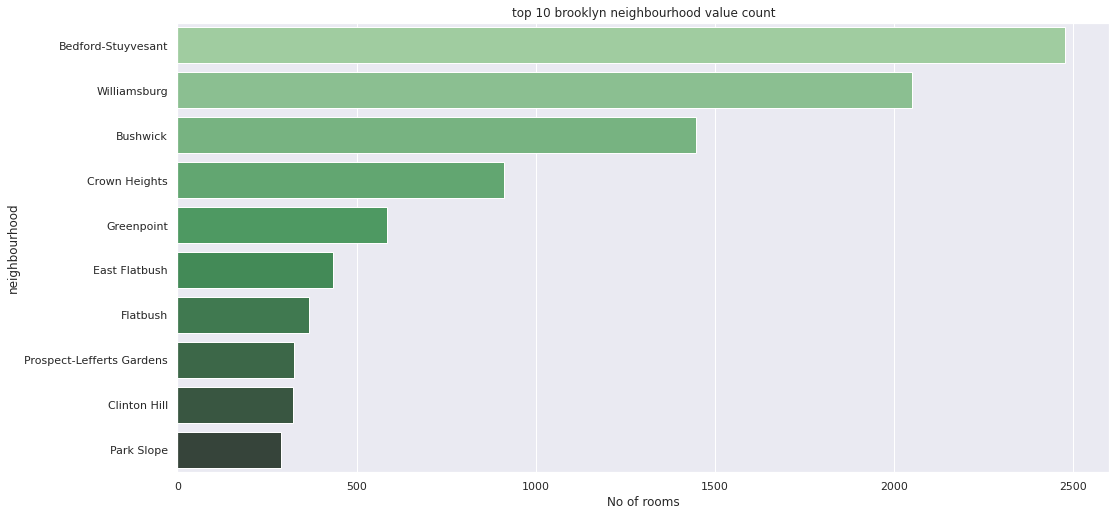

In [198]:
# top 10 areas in brooklyn with most booking
#creating a count plot
sns.countplot(y="neighbourhood", data=brooklyn_group_df, palette="Greens_d",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 brooklyn neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('No of rooms')

Text(0.5, 0, 'No of rooms')

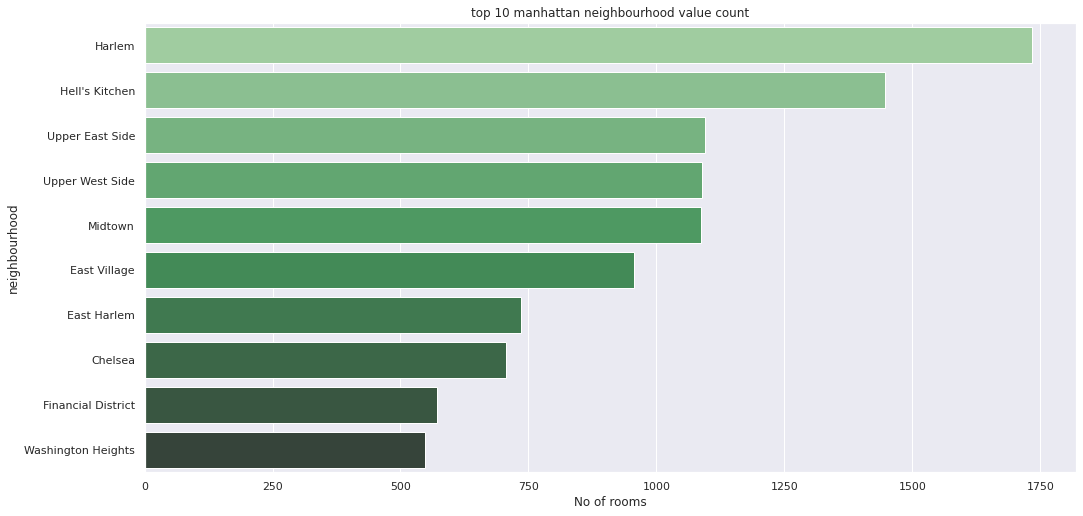

In [199]:
# top 10 areas in manhattan with most booking
#creating a count plot
sns.countplot(y="neighbourhood", data=manhattan_group_df, palette="Greens_d",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 manhattan neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('No of rooms')

Text(0.5, 0, 'No of rooms')

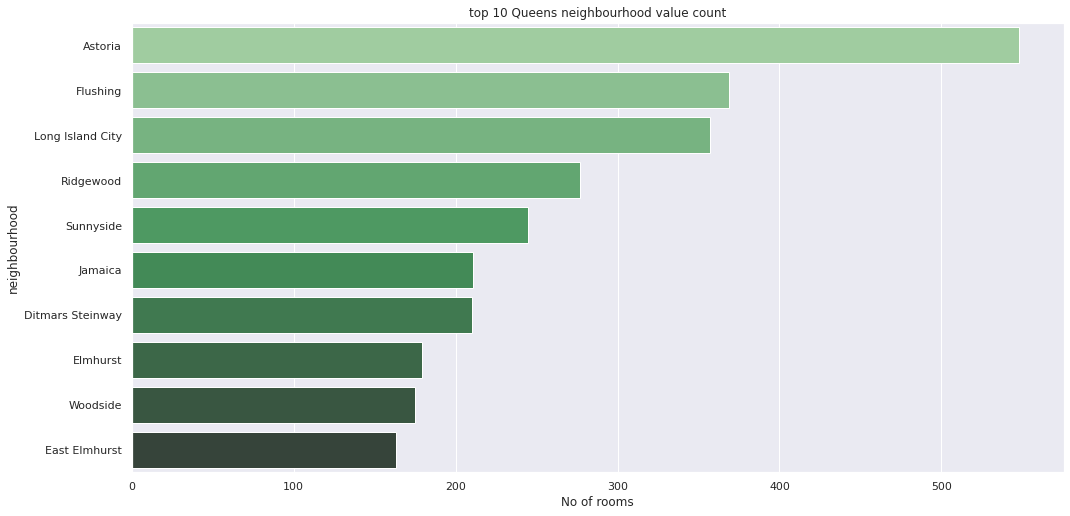

In [200]:
# top 10 areas in Queens with most booking
#creating a count plot

sns.countplot(y="neighbourhood", data=Queens_group_df, palette="Greens_d",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Queens neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('No of rooms')

Text(0.5, 0, 'No of rooms')

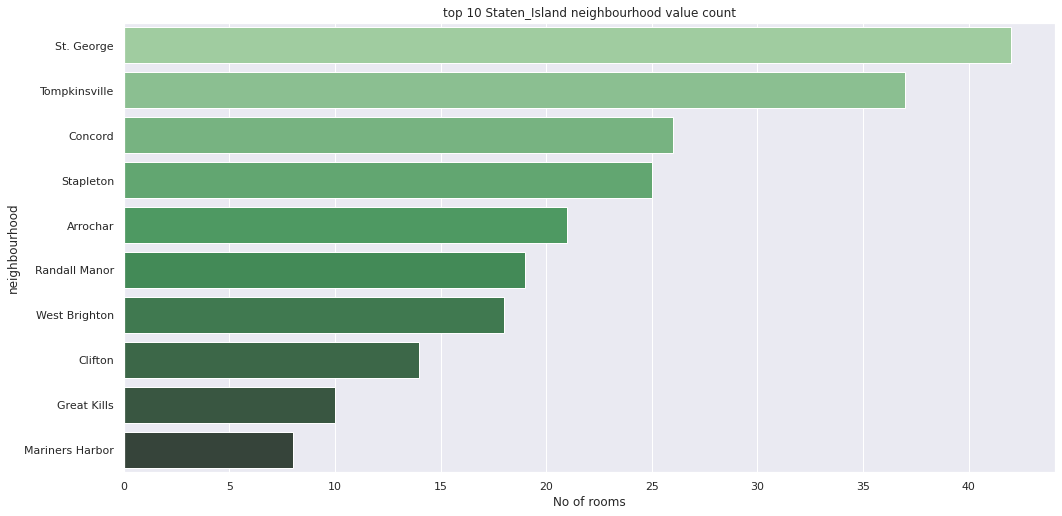

In [201]:
# top 10 areas in Staten_Island with most booking
#creating a count plot

sns.countplot(y="neighbourhood", data=Staten_Island_group_df, palette="Greens_d",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Staten_Island neighbourhood value count')

#adding x and y labels to the plot
plt.xlabel('No of rooms')              

Text(0.5, 0, 'No of rooms')

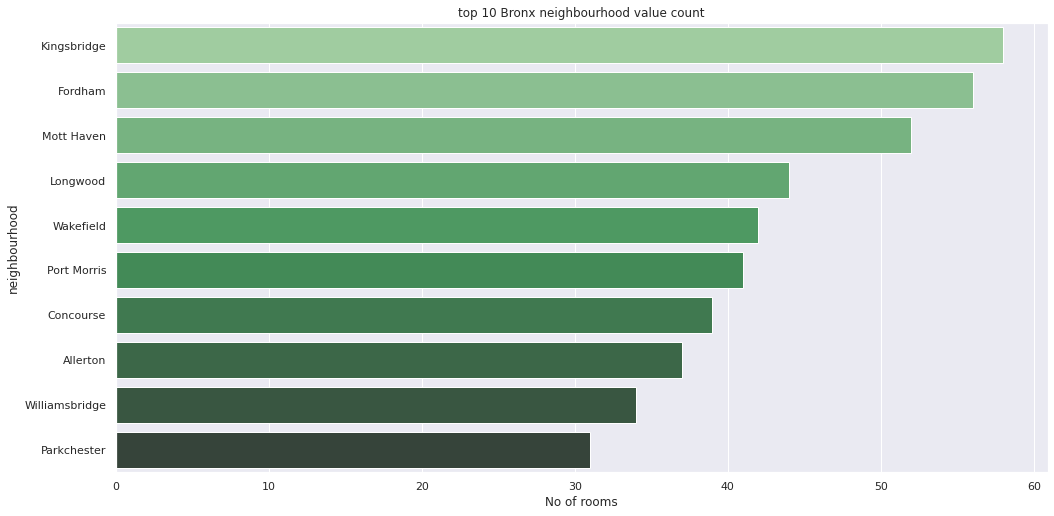

In [202]:
# top 10 areas in Staten_Island with most booking
#creating a count plot
sns.countplot(y="neighbourhood", data=Bronx_group_df, palette="Greens_d",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Bronx neighbourhood value count')

#adding x and y labels to the plot
plt.xlabel('No of rooms')             

from the above graphs we can say that
1. willamsburg, bedford and bushwick have most no of bookings in brooklyn neighbourhood_group
2. Harlem, Upper West Side and Hell's Kitchen have most no of bookings in manhattan neighbourhood_group
3. astoria, flushing and long island city  have most no of bookings in Queens neighbourhood_group
4. tompkinsville, St.George, cancaord ave most no of bookings in Staten_Island neighbourhood_group
5. in bronx neighbourhood_group all the neighbourhood have almost equal no of bookings

# Column NO. 6 & 7 : latitude & longitude

In [203]:
df.latitude.describe()

count    31354.000000
mean        40.728406
std          0.056562
min         40.499790
25%         40.688393
50%         40.723725
75%         40.763038
max         40.913060
Name: latitude, dtype: float64

In [204]:
df.longitude.describe()

count    31354.000000
mean       -73.948753
std          0.051400
min        -74.244420
25%        -73.983280
50%        -73.954115
75%        -73.930152
max        -73.712990
Name: longitude, dtype: float64

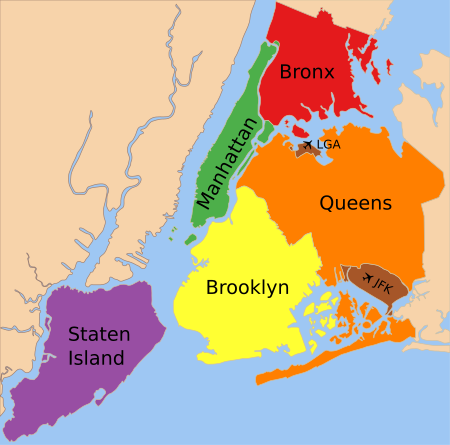

Text(0.5, 1.0, 'Density of rooms')

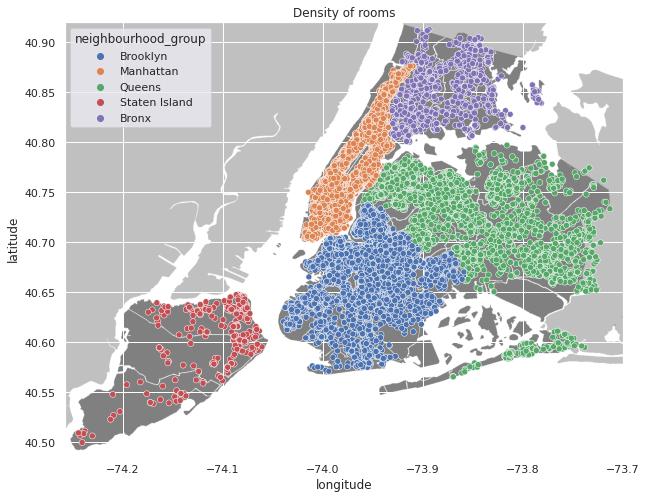

In [205]:
data = df[["latitude","longitude",'neighbourhood_group']]
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#adding the image from wikipedia
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
#reading the image
image=plt.imread(img)
#scaling img with max latitude and logtitude and makeig some minor adgustment to fit the points
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
#creating an scaterplot
sns.scatterplot(data = data,x='longitude',y='latitude',hue='neighbourhood_group').set_title('Density of rooms')


# Column NO. 8 : Room Type

Text(0.5, 0, 'Type of rooms')

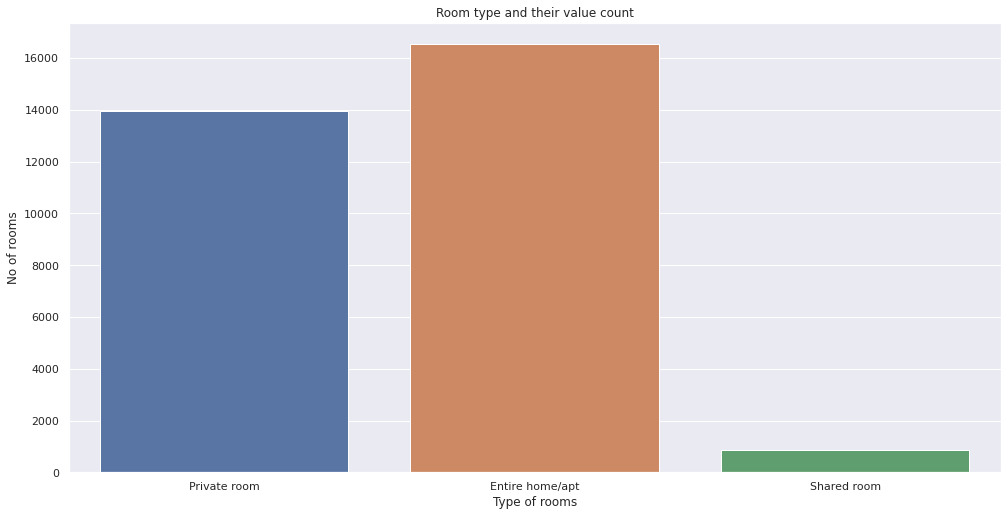

In [206]:
#creating a count plot
sns.countplot(x=df['room_type']).set_title('Room type and their value count')
#adding x and y labels to the plot
plt.ylabel('No of rooms') 
plt.xlabel('Type of rooms') 

by this graph we can conclude that people prefer booking entire home/apt or private room very few people prefere to have shared rooms.

# Column NO. 9 : price
what price range of rooms are more

Text(0, 0.5, 'No of rooms')

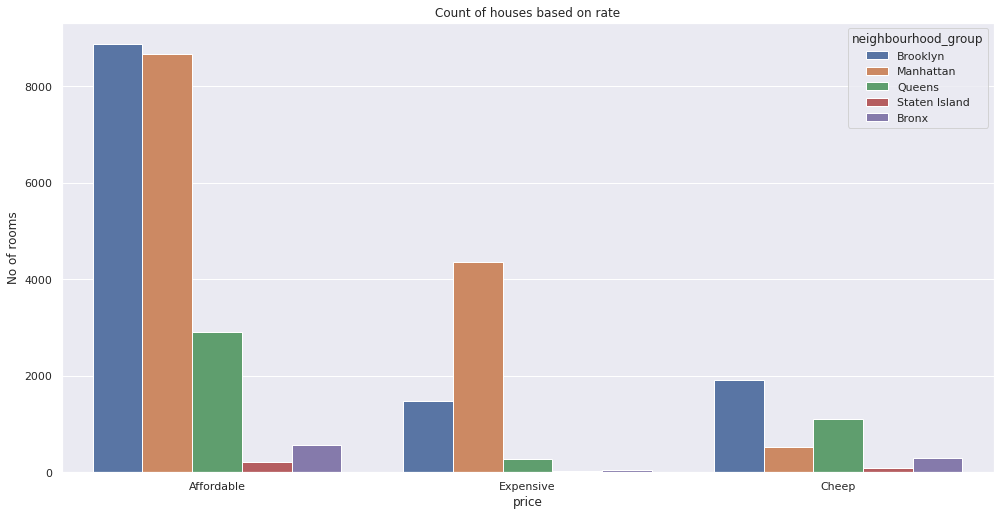

In [207]:
'''
dividing price range in 3 groups 
1) cheep i.e price below 50
2) affordable i.e price betwenn 50 & 200
3) expensive i.e price above 200
'''
def price_catagory(price):
  if price<=50:
    return 'Cheep'
  elif price>=50 and price<=200:
    return 'Affordable'
  else:
    return 'Expensive'
#creating a count plot 
sns.countplot(x=df.price.apply(price_catagory), hue=df.neighbourhood_group).set_title('Count of houses based on rate')
#adding y label to the plot
plt.ylabel('No of rooms') 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


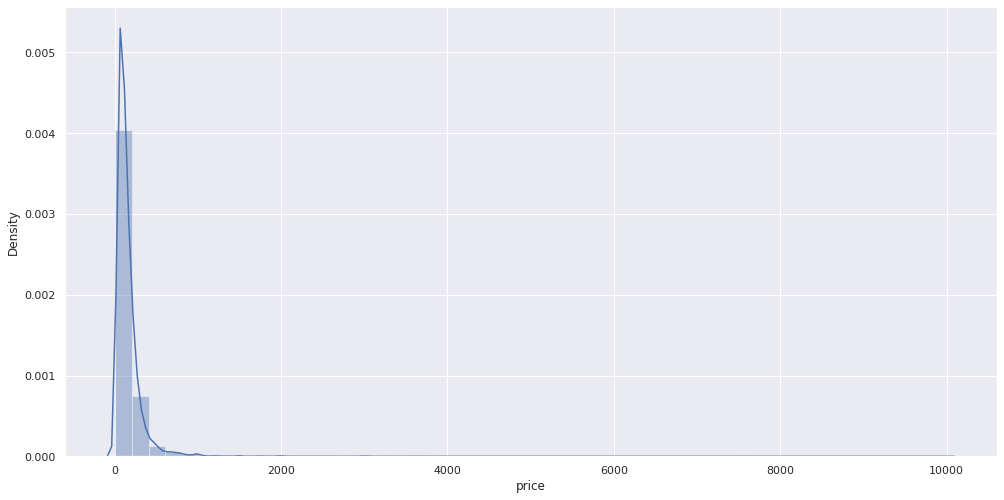

In [208]:
sns.distplot(df.price)

by the above graph we can conclude that people prefer the romms in range of 50 to 200

# Column NO. 10 : minimum_nights

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of rooms')

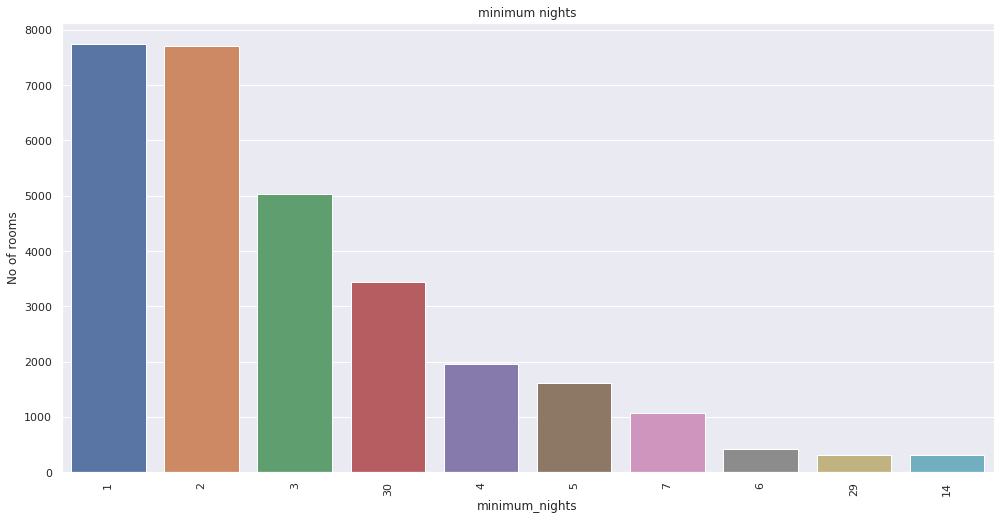

In [209]:
#creating a count plot 
sns.countplot(df.minimum_nights,order=df.minimum_nights.value_counts().iloc[:10].index).set_title('minimum nights')
#rotating x lables 
plt.xticks(rotation=90)
#adding x and y labels to the plot
plt.ylabel('No of rooms')
# change the tiltle of the grapg

This plots shows that majority of room booking are for 1 to 4 and then for 30 CHANGE Y AXIS NAME days

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


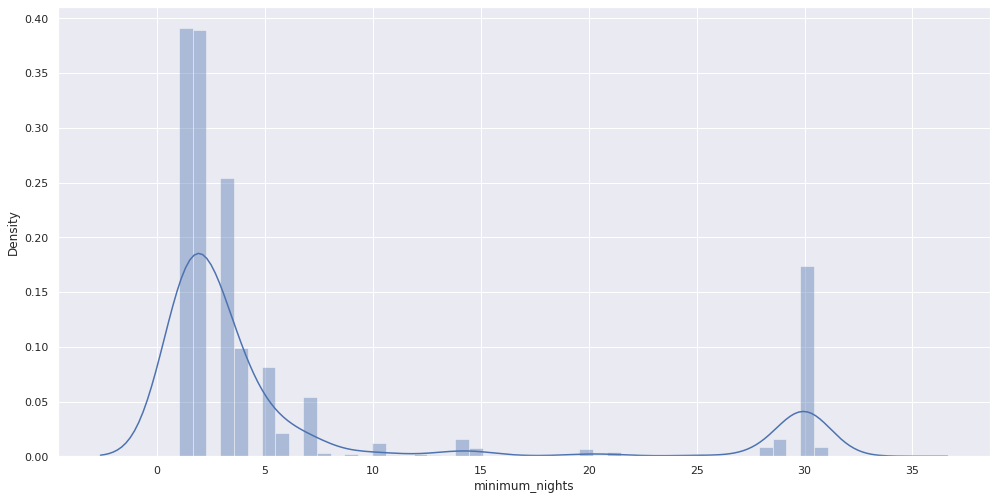

In [210]:
# subsetting the df with values of min night under 35
min_nights_df=df[df.minimum_nights<35]
#creating a distplot
sns.distplot(min_nights_df.minimum_nights)

by the above graph we can say that is is a right screwed (positive skewness)

# Column NO. 11 : number_of_reviews


In [211]:
df.number_of_reviews.describe()

count    31354.000000
mean        31.849365
std         51.638559
min          0.000000
25%          2.000000
50%         10.000000
75%         39.000000
max        629.000000
Name: number_of_reviews, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

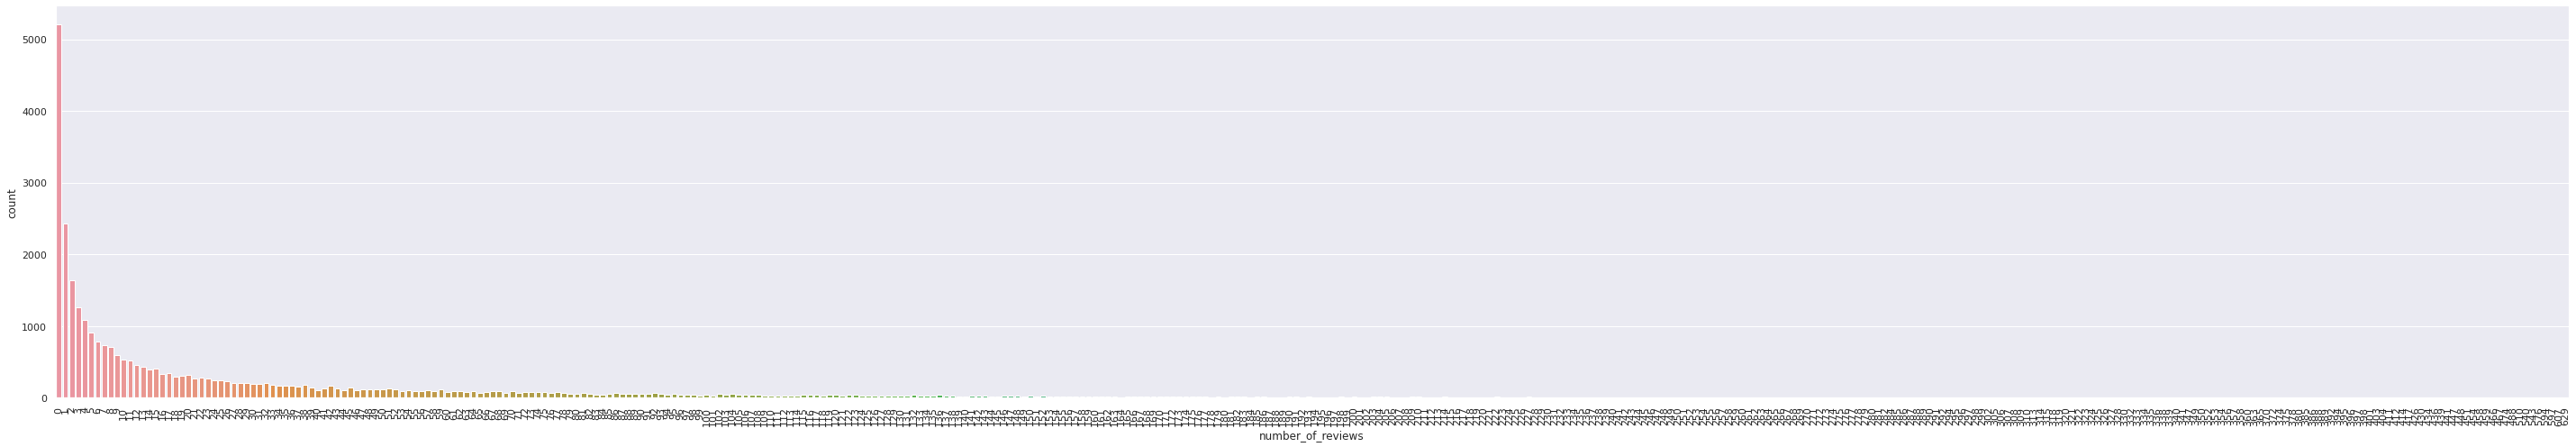

In [212]:
#settingt he size of the figure 
plt.figure(figsize=(50,8))
#creating a caunt plot
sns.countplot(df.number_of_reviews)
#rotating the x lables
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


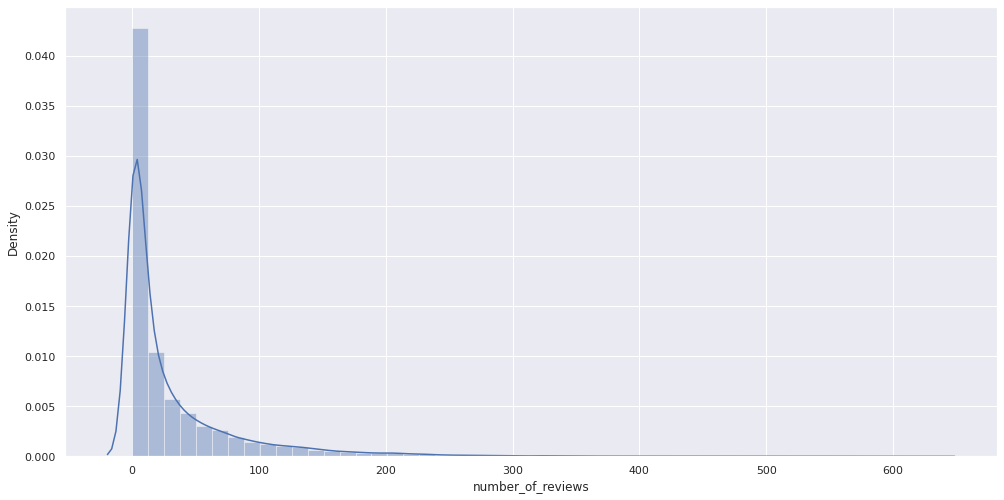

In [213]:
#creating a dist plot
sns.distplot(df.number_of_reviews)

This column tells us about the number of reviews an apartment has got so far
where the min value is 0 its cause can be
1. no one has visited this place
2. no one has reviewed
3. the values are missing


It has a mean of 32, median of 10, and max of 629 rating


From the above graph, we can say that it is a right screwed (positive skewness) with very few homes rated above 200

# Column NO. 12 : last_review


In [214]:
df.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
5       2019-06-22
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 31354, dtype: datetime64[ns]

In [215]:
#printing the least and most recent review date
least_recent_date = df['last_review'].min()
most_recent_date = df['last_review'].max()
print(f'the least recent date is {least_recent_date.date()} and the most recent date is {most_recent_date.date()} in last review')

the least recent date is 2011-04-25 and the most recent date is 2019-07-08 in last review


In [216]:
df[df.last_review < '2015-01-01'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 102 to 5840
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              94 non-null     int64         
 1   name                            94 non-null     object        
 2   host_id                         94 non-null     int64         
 3   host_name                       94 non-null     object        
 4   neighbourhood_group             94 non-null     object        
 5   neighbourhood                   94 non-null     object        
 6   latitude                        94 non-null     float64       
 7   longitude                       94 non-null     float64       
 8   room_type                       94 non-null     object        
 9   price                           94 non-null     int64         
 10  minimum_nights                  94 non-null     int64         
 11  numb

In [217]:
df[df.last_review.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5207 entries, 2 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              5207 non-null   int64         
 1   name                            5207 non-null   object        
 2   host_id                         5207 non-null   int64         
 3   host_name                       5206 non-null   object        
 4   neighbourhood_group             5207 non-null   object        
 5   neighbourhood                   5207 non-null   object        
 6   latitude                        5207 non-null   float64       
 7   longitude                       5207 non-null   float64       
 8   room_type                       5207 non-null   object        
 9   price                           5207 non-null   int64         
 10  minimum_nights                  5207 non-null   int64         
 11  num

This column tells us about the when an apartment got his last review an apartment where there are some missing values its reason can be that
1. no one has visited this place
2. no one has reviewed
3. the values are missing

The least_recent_date is 2011-04-25 and the most_recent_date is 2019-07-08 in last review

we can conclude that these apartments may have been closed or not available as no one has reviewed them for 50 years 

there are a total of 94 apartments that haven't been reviewed in the last 5 years and 5207 absent data

# Column NO. 13 : reviews_per_month

In [218]:
df.reviews_per_month.describe()

count    31354.000000
mean         1.509464
std          1.781202
min          0.000000
25%          0.170000
50%          0.920000
75%          2.340000
max         58.500000
Name: reviews_per_month, dtype: float64

Text(0, 0.5, 'No of rooms')

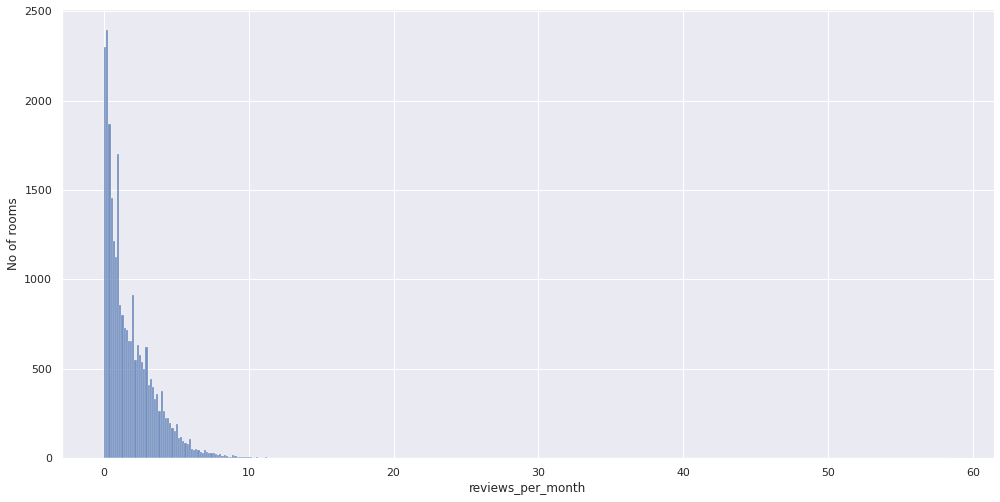

In [219]:
#creating histplot and adding lablesto y axis
sns.histplot(df[df['reviews_per_month']>0].reviews_per_month)
plt.ylabel('No of rooms')

From the above graph, we can observe that very less amount of houses have review per month greater  than 5 
with a mean of 0.92 and a max of 58.5

# Column NO. 14 : calculated_host_listings_count

In [220]:
#grouping by host id and taking sum of reviews per month
top_10_host_listings_count=df.groupby(['host_id']).agg({'calculated_host_listings_count':'max'}).sort_values('calculated_host_listings_count',ascending=False).reset_index()
#taking top 10 from df and storing it in list  
top_10_host_listings_count_list=top_10_host_listings_count[:10]['host_id'].tolist()
# finding the names of all the top 10 host by host id 
top_10_host_listings_count_df=df[df.host_id.isin(top_10_host_listings_count_list)].sort_values('calculated_host_listings_count',ascending=False)

Text(0, 0.5, 'No of rooms')

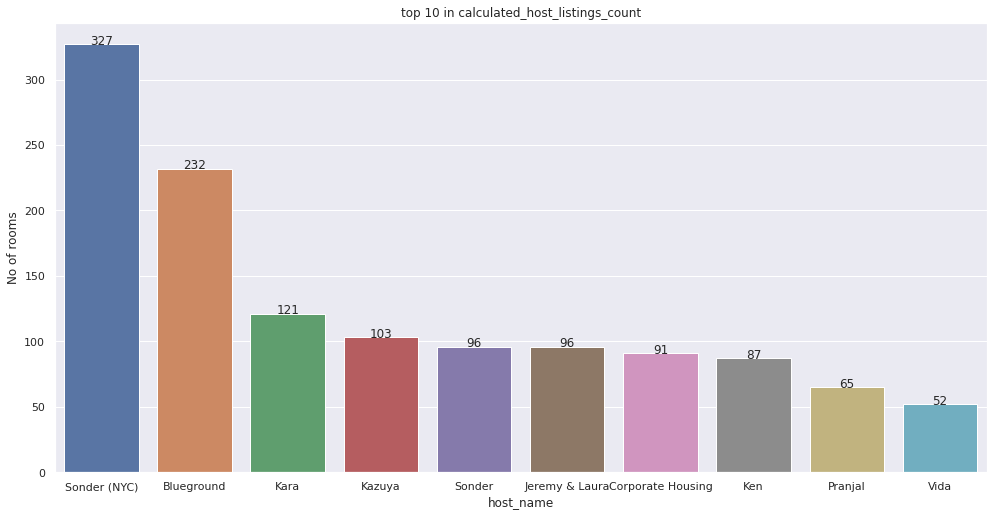

In [221]:
# code to add the count on top of bar graph
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

#creating a bar graph 
sns.barplot(x="host_name", y='calculated_host_listings_count' ,data=top_10_host_listings_count_df).set_title('top 10 in calculated_host_listings_count')
# adding lables on bar graph
addlabels(top_10_host_listings_count_df.host_name.unique().tolist(),top_10_host_listings_count[:10]['calculated_host_listings_count'].tolist())
#adding y label to plot 
plt.ylabel('No of rooms')

The top two hosts with max listing count are sonder(NYC) and Blueground with 327 and 232 rooms respectively. 

#Column NO. 15 : availability_365 

In [222]:
df.availability_365.describe()  

count    31354.000000
mean       175.834439
std        126.195374
min          1.000000
25%         55.000000
50%        168.000000
75%        305.000000
max        365.000000
Name: availability_365, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of rooms')

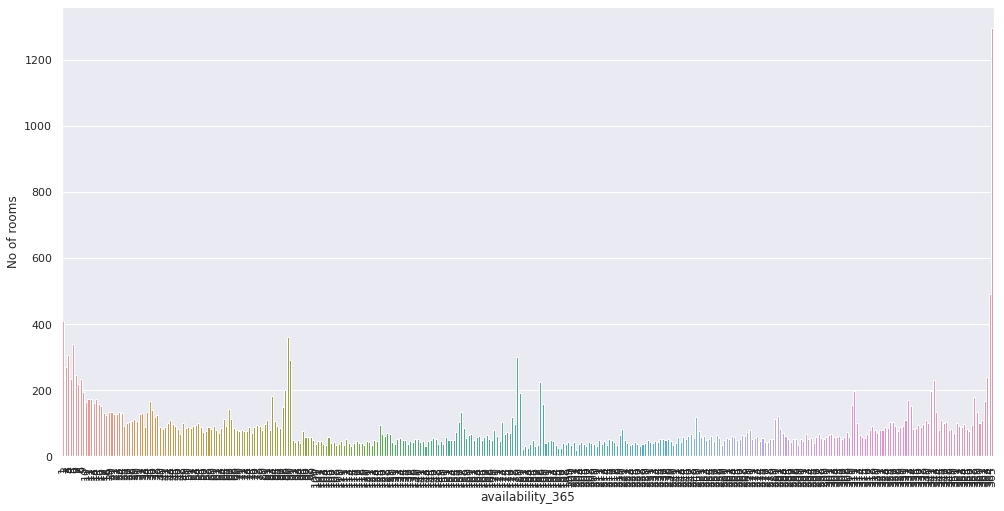

In [223]:
sns.countplot(df.availability_365)
plt.xticks(rotation=90)
plt.ylabel('No of rooms')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


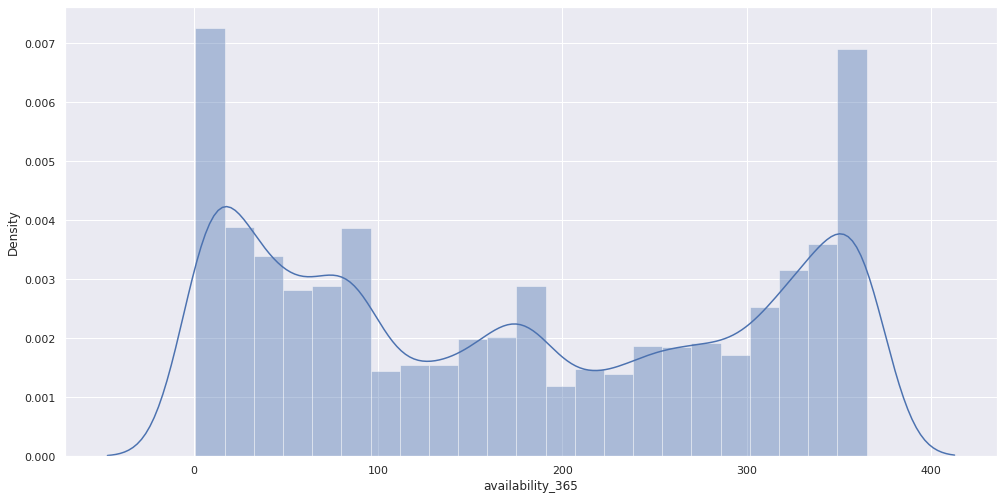

In [224]:
sns.distplot(df.availability_365)

Observations 

most of the rooms are either available for less than 16 days or almost full year

# Correlation Analysis

#1) if we have higher min nights does that mean price per night will be less	 ( need more analysis)

# 2) word used to attract people

(-0.5, 399.5, 199.5, -0.5)

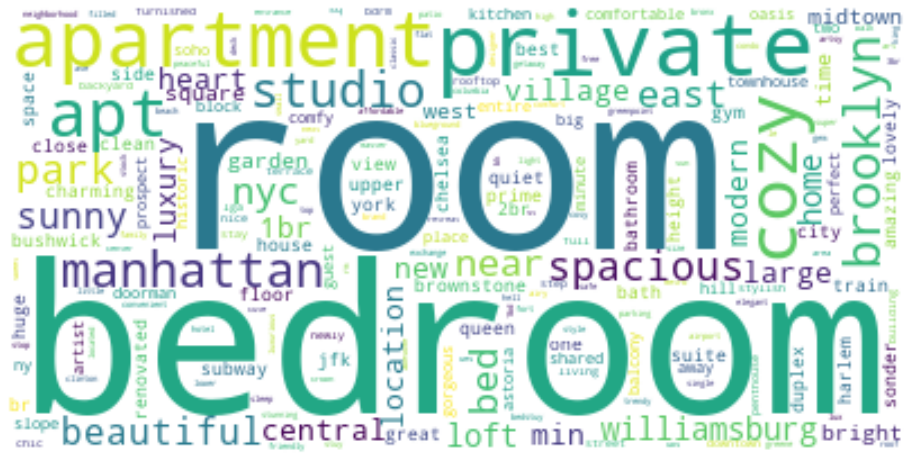

In [225]:
#Creating the text variable

text = " ".join(name for name in df.name)

text=text.lower()

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

# 3) does no of review affect the price

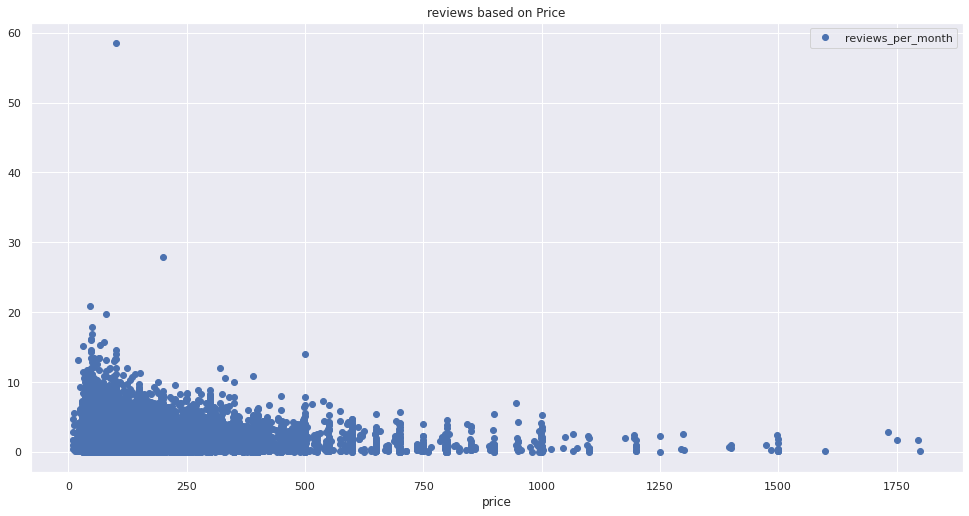

In [226]:
price_review = df[['reviews_per_month', 'price']].sort_values(by = 'price')
price_review=price_review.loc[price_review['reviews_per_month']>0]
price_review=price_review.loc[price_review['price']<2000]
price_review.plot(x = 'price', y = 'reviews_per_month', 
                  style = 'o',
                  title = 'reviews based on Price')

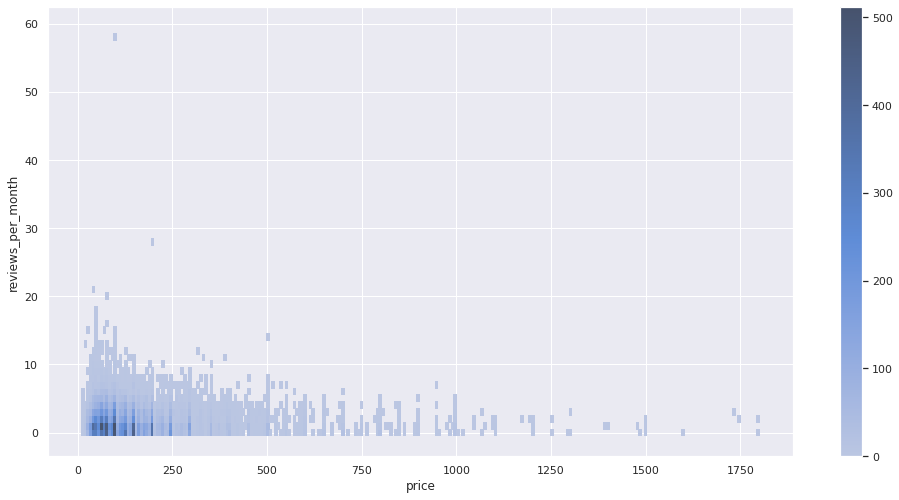

In [227]:
sns.histplot(data = price_review, x = 'price', y = 'reviews_per_month',discrete=(False,True),cbar=True)

Observations

1) review per month of price range between 0 & 250 is more by which we can conclude that most people prefer renting rooms which have a price below 250 

2) reviews per month decrease as you increase the price

# 4) Which neighbourhood is most expensive in NewYork City?

#5) is there any relation between any columns

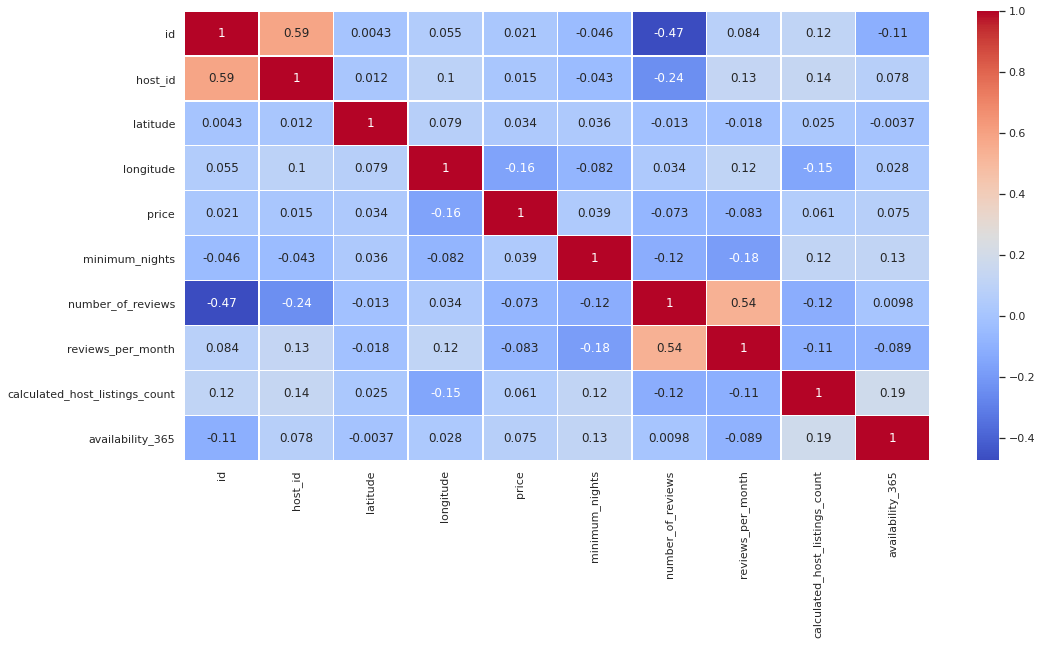

In [228]:
# generating heat map and finding the realation between the collumns
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm',linewidths=.5)

# 6) which neighbourhood_group(city)  has more no of listings and of which type ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Neighbourhood group')

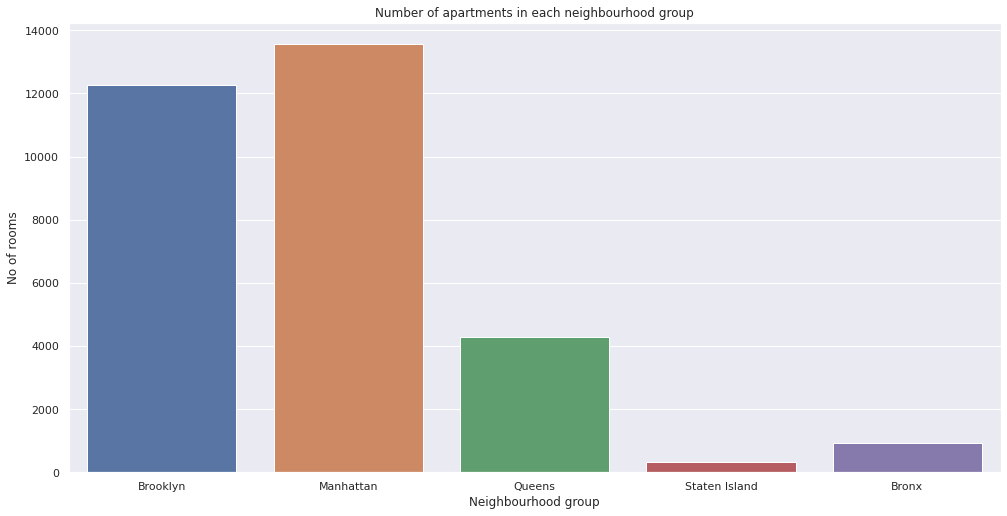

In [229]:
#creating a count plot 
sns.countplot(df.neighbourhood_group).set_title('Number of apartments in each neighbourhood group')
#adding x and y labels to the plot
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood group')

Text(0.5, 0, 'Neighbourhood group')

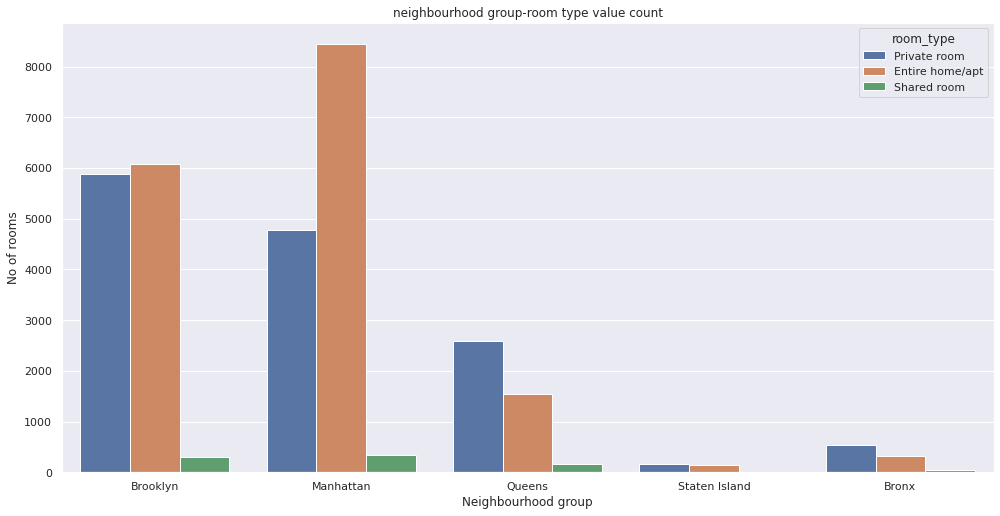

In [230]:
#creating a count plot
sns.countplot(data=df,x='neighbourhood_group',hue='room_type').set_title('neighbourhood group-room type value count')
#adding x and y labels to the plot
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood group')

Observation
1. We can see that most no of rooms are in Manhattan followed by brooklyn and queens
2. Manhattan people prefer to book an entire home rather than a private room. Brooklyn, both have approx equal no of count while people do not prefer a shared room in either of the city.

# 7) which neighbourhood has more no of listings and of which type 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of rooms')

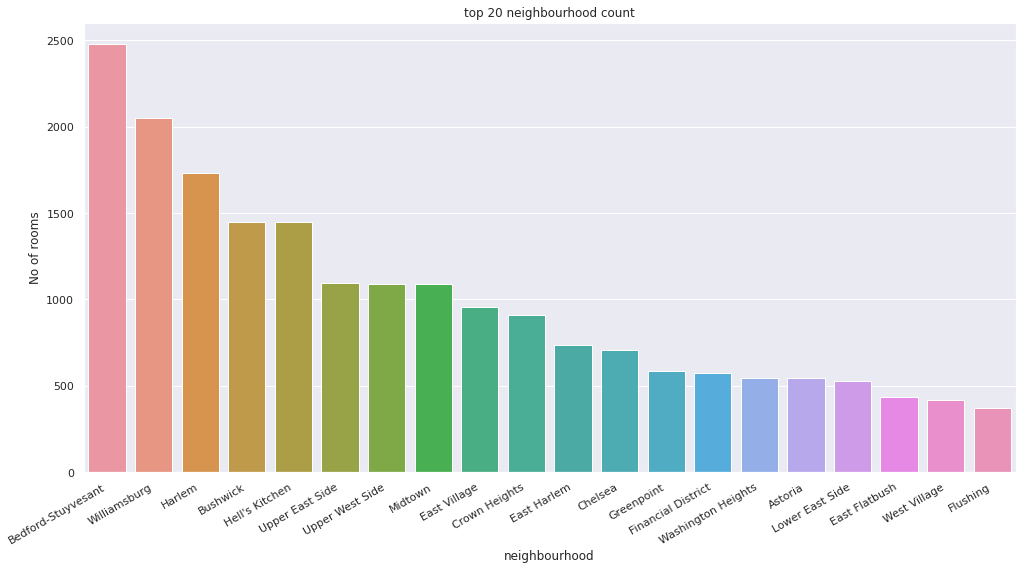

In [231]:
#creating a count plot
sns.countplot(df.neighbourhood, order = df.neighbourhood.value_counts().iloc[:20].index ).set_title('top 20 neighbourhood count')
#rotating the x axis labels 
plt.xticks(rotation=30,ha='right')
#adding x and y labels to the plot
plt.ylabel('No of rooms')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of rooms')

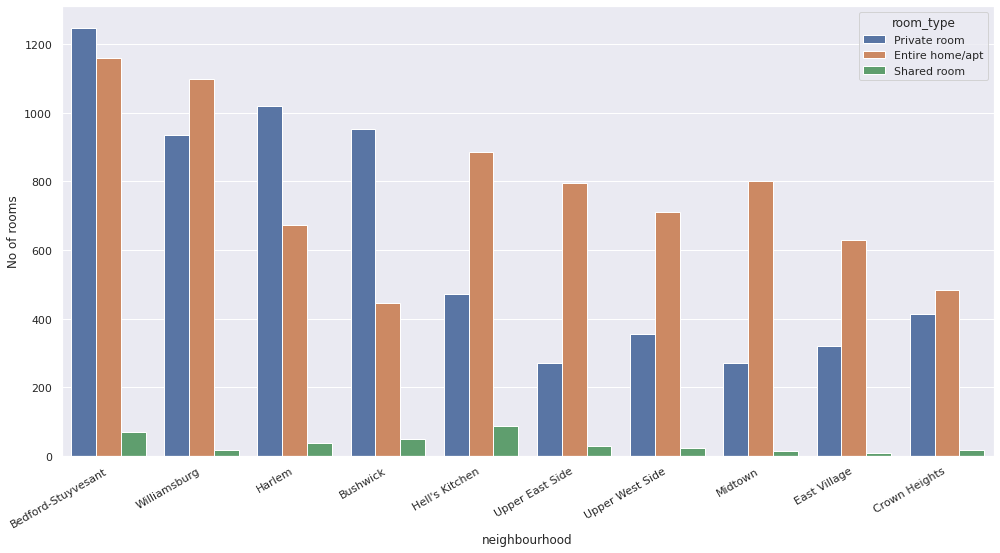

In [232]:
sns.countplot(df.neighbourhood, order = df.neighbourhood.value_counts().iloc[:10].index ,hue=df['room_type'])
#rotating the x axis labels 
plt.xticks(rotation=30,ha='right')
#adding x and y labels to the plot
plt.ylabel('No of rooms')


Text(0.5, 1.0, 'top 10 Bronx neighbourhood value count')

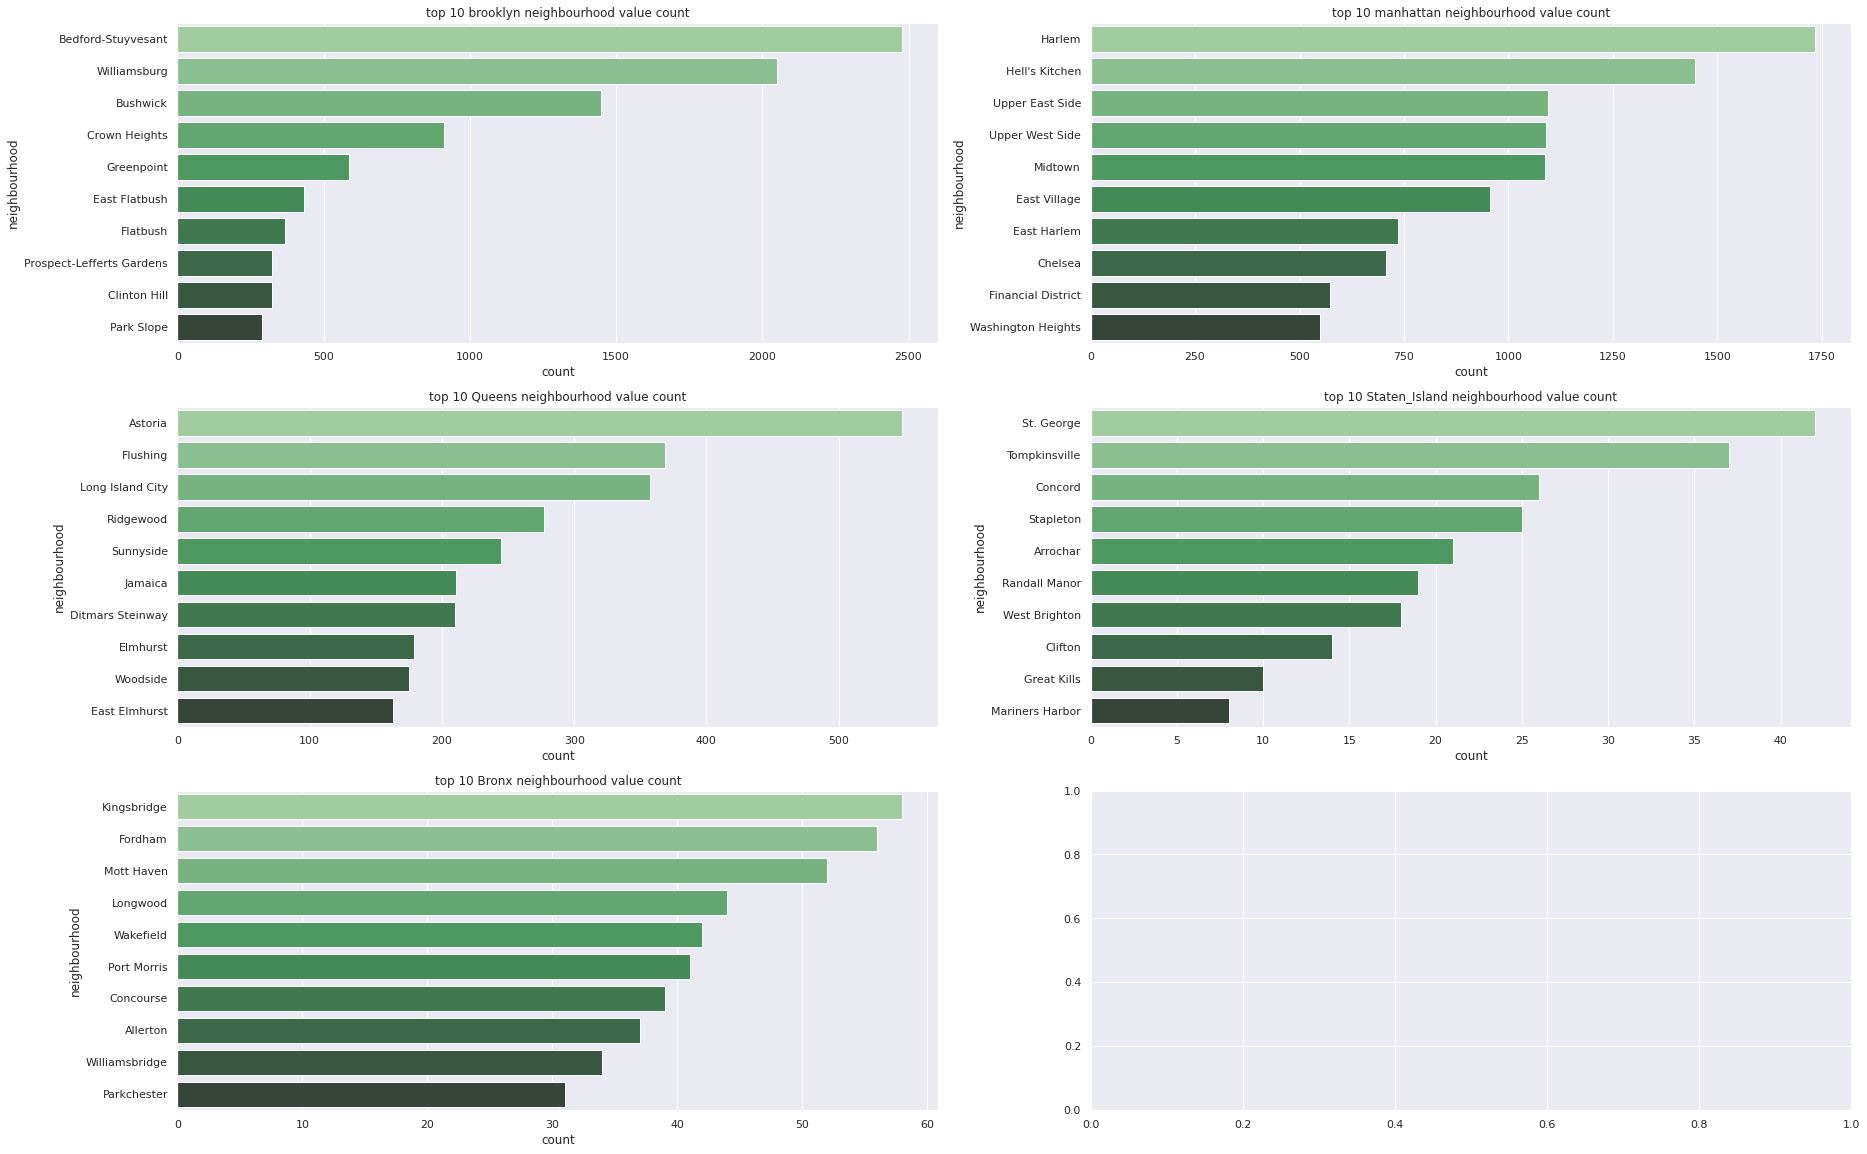

In [233]:
# creating subplots to plot all the graphs together 
fig, axes = plt.subplots(3,2, figsize=(30, 20))
sns.countplot(ax=axes[0,0],y="neighbourhood", data=brooklyn_group_df, palette="Greens_d",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 brooklyn neighbourhood value count')
              
sns.countplot(ax=axes[0,1],y="neighbourhood", data=manhattan_group_df, palette="Greens_d",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 manhattan neighbourhood value count')

sns.countplot(ax=axes[1,0],y="neighbourhood", data=Queens_group_df, palette="Greens_d",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Queens neighbourhood value count')

sns.countplot(ax=axes[1,1],y="neighbourhood", data=Staten_Island_group_df, palette="Greens_d",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Staten_Island neighbourhood value count')

sns.countplot(ax=axes[2,0],y="neighbourhood", data=Bronx_group_df, palette="Greens_d",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Bronx neighbourhood value count')


# 8) price distribution across different neighbourhood

In [234]:
city_room_type_df=df.groupby(['neighbourhood_group','room_type']).agg({'price':'median'}).sort_values('price',ascending=False).reset_index().rename(columns={"price": "median_price"})
neighbourhood_group_df=df.groupby(['neighbourhood_group']).agg({'price':'median'}).sort_values('price',ascending=False).reset_index().rename(columns={"price": "median_price"})


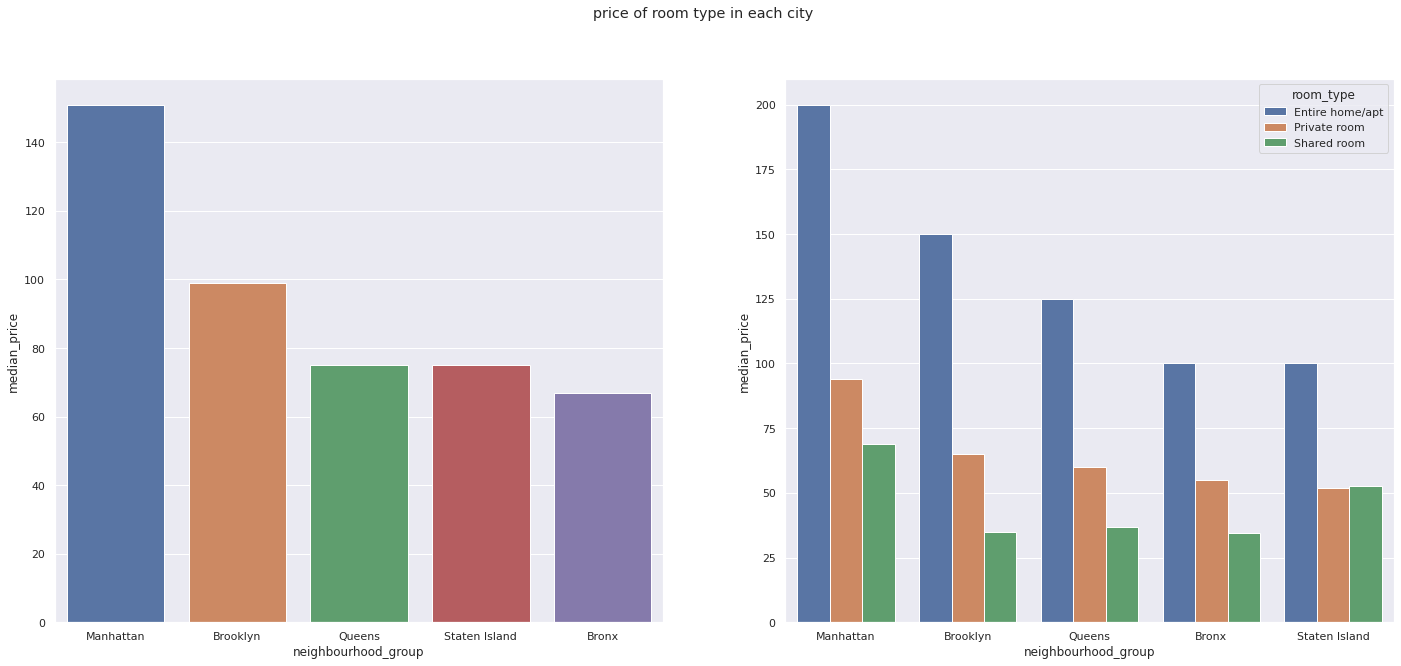

In [235]:
fig, axes = plt.subplots(1,2, figsize=(24, 10))
fig.suptitle('price of room type in each city')
sns.barplot(ax=axes[0],data=neighbourhood_group_df,x='neighbourhood_group',y='median_price')
sns.barplot(ax=axes[1],data=city_room_type_df,x='neighbourhood_group',hue='room_type',y='median_price')

Observations

Among all the cities manhattan houses are most expensive for all the room types followed by Brooklyn and Bronx are least expensive


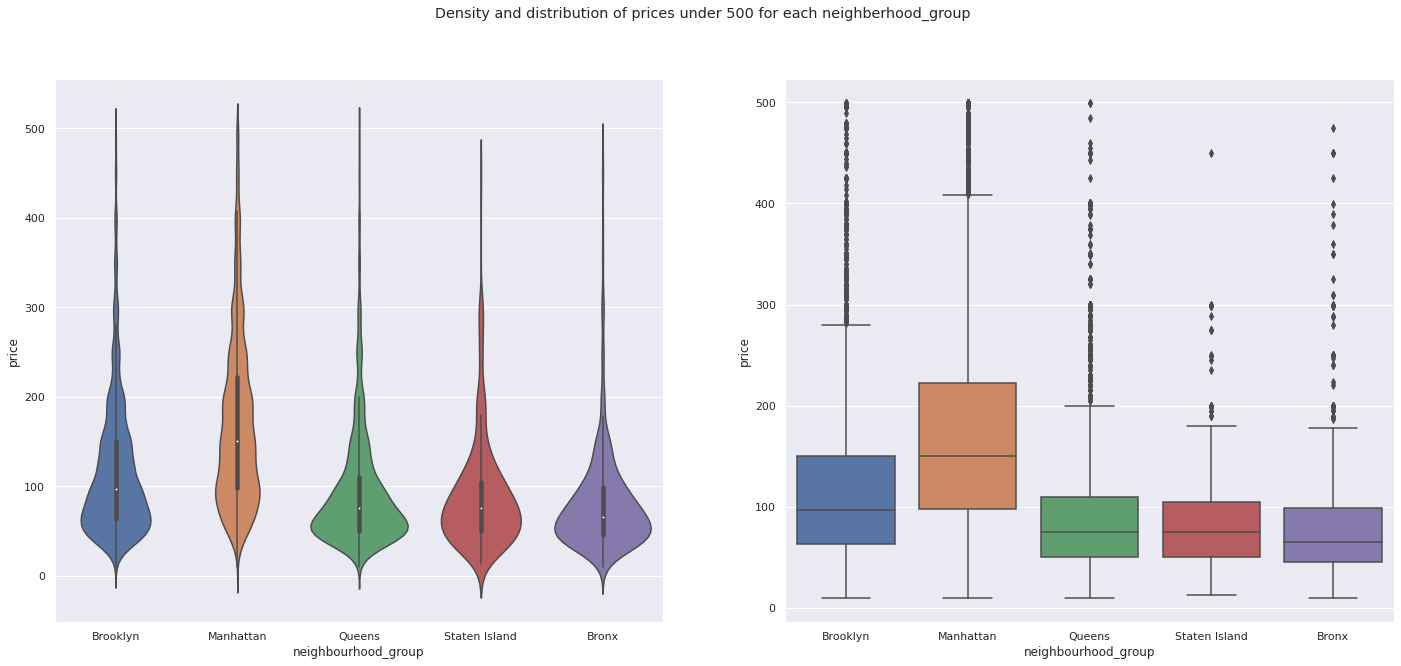

In [236]:
#creating a sub-dataframe with  extreme values  less than 500
sub_df=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices 
fig, axes = plt.subplots(1,2, figsize=(24, 10))
fig.suptitle('Density and distribution of prices under 500 for each neighberhood_group')
sns.violinplot(ax=axes[0],data=sub_df, x='neighbourhood_group', y='price')
sns.boxplot(ax=axes[1],data=sub_df, x='neighbourhood_group', y='price')


Observations

In this violin plot, we can observe the distribution of prices. We can state that Manhattan has the highest range of prices with an average of 150, Brooklyn with 90. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest.
We can conclude that Manhattan is one of the most expensive places followed by Brooklyn and Queens.


# 9) what price range of rooms are more

ans in column no 9

#10) availability 365 is proportional to review per month

# 11) make a graph of host which are inactive